In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('train.csv')

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [78]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [79]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

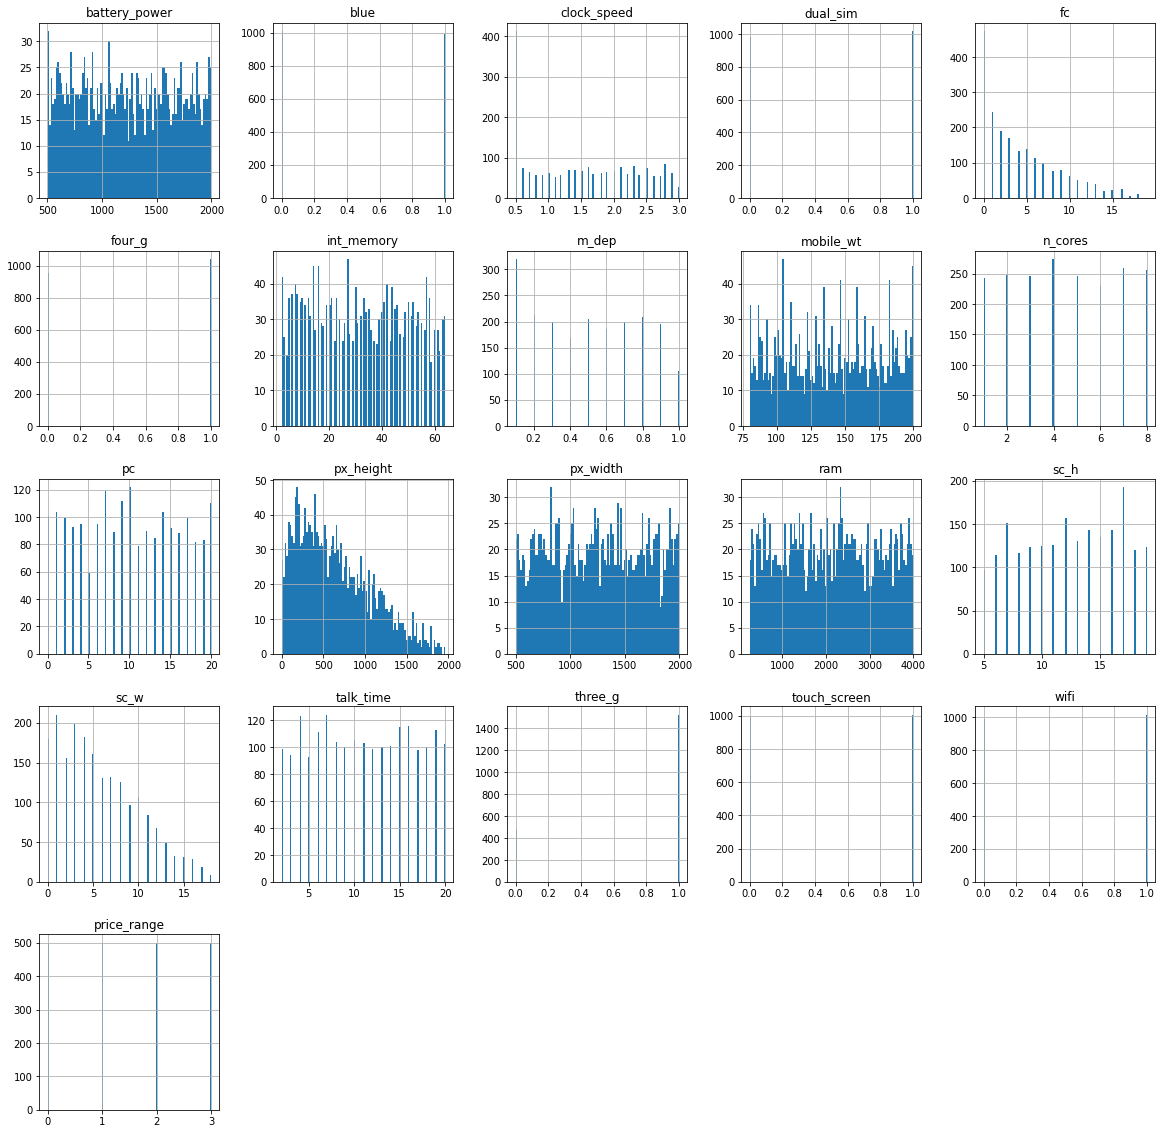

In [80]:
# view the histogram of the data set, to get feel of the data sets
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,20))
plt.show()

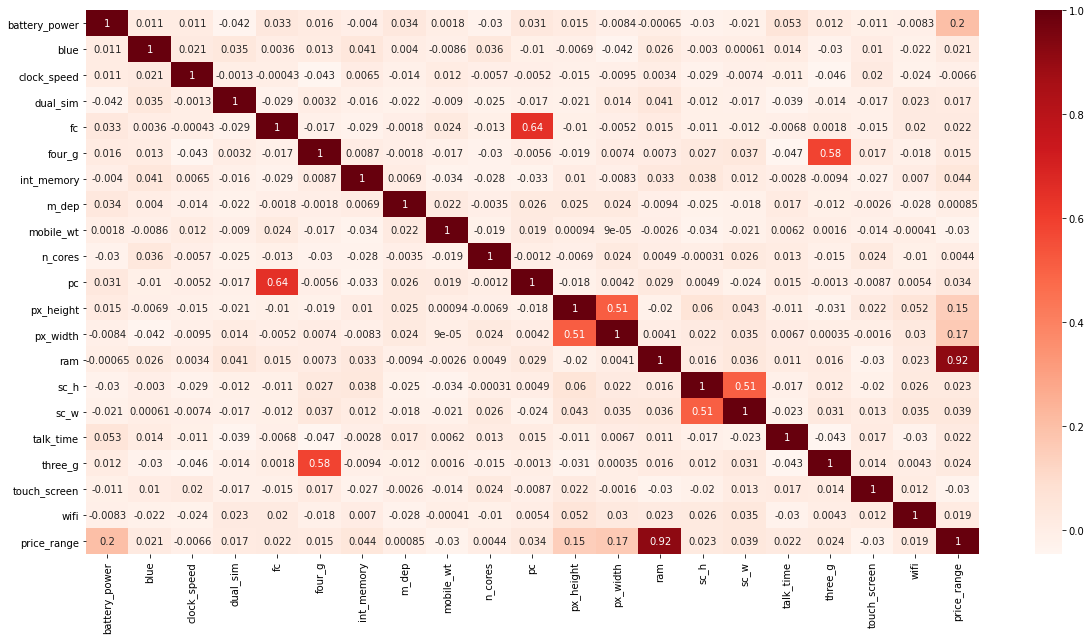

In [81]:
# Using a correlation to see features that are highly correlated to the target
import seaborn as sn

plt.figure(figsize = (20,10))
sn.heatmap(df.corr(), annot=True,cmap="Reds")

In [82]:
#Define X and y
X = df.drop('price_range',axis=1)
y = df['price_range']

In [83]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

plt.figure(figsize=(8,6))
plt.show()

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(df.drop(['price_range'],axis=1),y)
fit.scores_


<Figure size 576x432 with 0 Axes>

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [84]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [85]:
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']
f_Scores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [86]:
ten_best_features = f_Scores.nlargest(10,'Score')
ten_best_features

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


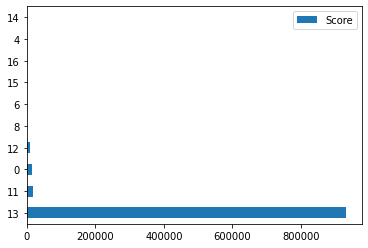

<Figure size 576x432 with 0 Axes>

In [87]:
ten_best_features.plot(kind='barh')
plt.figure(figsize=(8,6))
plt.show()

In [88]:
col_ten_best = ten_best_features['Specs'].values
col_ten_best

array(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h'], dtype=object)

In [89]:
#Define new X and y
X = df[col_ten_best]
y = df['price_range']
X

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [90]:
#Normalisasi
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X.shape

(2000, 10)

In [91]:
X

array([[ 0.39170341, -1.40894856, -0.90259726, ...,  1.46249332,
        -0.76249466, -0.78498329],
       [ 0.46731702,  0.58577791, -0.49513857, ..., -0.73426721,
        -0.99289039,  1.11426556],
       [ 0.44149774,  1.39268422, -1.5376865 , ..., -0.36814045,
        -0.53209893, -0.31017108],
       ...,
       [ 0.86013895,  0.50238257,  1.53077336, ..., -1.10039396,
        -0.76249466, -0.78498329],
       [-1.15745352, -0.69670724,  0.62252745, ...,  1.46249332,
        -0.07130748,  1.35167167],
       [ 1.65500399, -0.3653798 , -1.65833069, ..., -1.6495841 ,
         0.15908825,  1.58907778]])

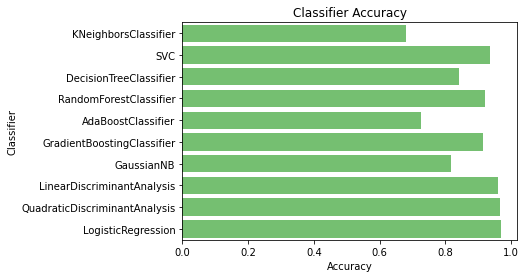

In [92]:
#Finding The Best Classification model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

In [93]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.6800
0,SVC,0.9350
0,DecisionTreeClassifier,0.8425
0,RandomForestClassifier,0.9200
0,AdaBoostClassifier,0.7250
0,GradientBoostingClassifier,0.9150
0,GaussianNB,0.8175
0,LinearDiscriminantAnalysis,0.9600
0,QuadraticDiscriminantAnalysis,0.9650
0,LogisticRegression,0.9700


In [94]:
log.nlargest(5,'Accuracy')

,Classifier,Accuracy
0,LogisticRegression,0.970
0,QuadraticDiscriminantAnalysis,0.965
0,LinearDiscriminantAnalysis,0.960
0,SVC,0.935
0,RandomForestClassifier,0.920


# 1. Logistic Regression

In [95]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C':np.arange(0.0001,1),'solver':['newton-cg','lbfgs','sag','saga'],'penalty' : ['l1', 'l2', 'elasticnet','none'],'class_weight':['balanced','dict']}
gscv1 = GridSearchCV(LogisticRegression(), param_grid=param_grid)
gscv1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.0001]),
                         'class_weight': ['balanced', 'dict'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [96]:
gscv1.best_params_

{'C': 0.0001, 'class_weight': 'balanced', 'penalty': 'none', 'solver': 'sag'}

In [97]:
gscv1.best_score_

0.975

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model_LR = LogisticRegression(C=0.0001, solver='sag',penalty='none',class_weight='balanced').fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [131]:
ypred1 = model_LR.predict(X_test)

In [132]:
ypred_prob = model_LR.predict_proba(X_test)
ypred_prob

array([[1.46295297e-38, 1.40223747e-16, 3.65186516e-04, 9.99634813e-01],
       [9.99999997e-01, 2.54378839e-09, 2.96546978e-27, 2.10277951e-55],
       [8.19926154e-15, 5.11987399e-03, 9.94880071e-01, 5.54571154e-08],
       ...,
       [1.00000000e+00, 1.68343057e-13, 1.66800351e-35, 2.32565162e-67],
       [1.23375725e-26, 4.67753751e-09, 8.53565184e-01, 1.46434812e-01],
       [6.53967064e-01, 3.46032936e-01, 8.82596038e-11, 1.88949485e-30]])

In [133]:
#jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, ypred1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.97

In [134]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
accuracy_score(y_test, ypred1)

0.97

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred1) 

array([[ 95,   0,   0,   0],
       [  2,  88,   2,   0],
       [  0,   3,  94,   2],
       [  0,   0,   3, 111]])

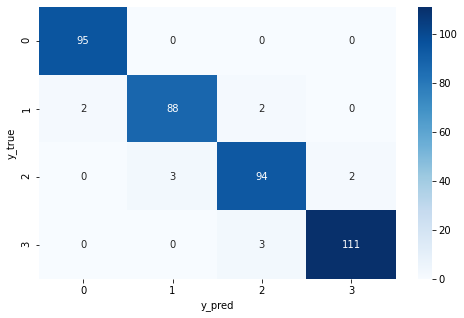

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, ypred1), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# 2. KNN (K-Nearest Neighbour)

In [105]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(2,30),'weights':['uniform','distance']}
gscv2 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,cv=10)
gscv2.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
gscv2.best_params_

{'n_neighbors': 28, 'weights': 'distance'}

In [107]:
gscv2.best_score_

0.7306250000000001

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model_knn = KNeighborsClassifier(n_neighbors=28, weights='distance')
model_knn.fit(X_train,y_train)
ypred2 = model_knn.predict(X_test)
acc = accuracy_score(y_test, ypred2)
acc

0.7325

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred2) 

array([[82, 13,  0,  0],
       [20, 52, 19,  1],
       [ 0, 18, 72,  9],
       [ 0,  1, 26, 87]])

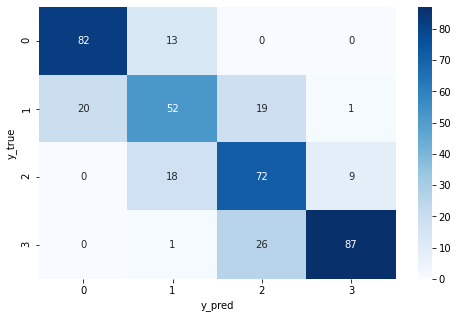

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, ypred2), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# 3. SVM (Support Vector Machines)

In [111]:
svci = SVC(C=1,kernel = 'rbf', gamma = 'auto') 
param_grid = { 
    'kernel': ['poly', 'rbf', 'sigmoid'] ,
    'C': [0.001,0.1,0.7,1],
    'gamma' : ['auto','scale']
}

gscv3 = GridSearchCV(estimator=svci, param_grid=param_grid, cv= 10)
gscv3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 0.7, 1], 'gamma': ['auto', 'scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [112]:
gscv3.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [113]:
gscv3.best_score_

0.9175000000000001

In [114]:
model_svc = SVC(C=0.1,kernel = 'sigmoid', gamma = 'auto')
model_svc.fit(X_train,y_train)
ypred3 = model_svc.predict(X_test)
acc = accuracy_score(y_test, ypred3)
acc

0.9275

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred3)

In [116]:
norm = np.linalg.norm(cm)
ncm = cm/norm

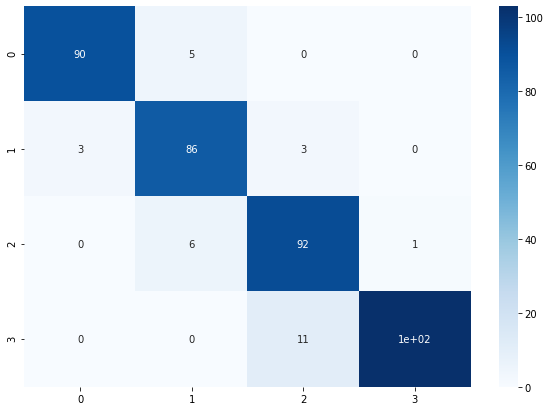

In [117]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in range (4)],
              columns = [i for i in range (4)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="Blues")

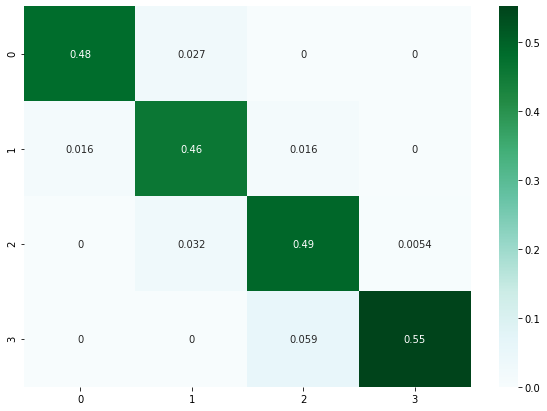

In [118]:
df_ncm = pd.DataFrame(ncm, index = [i for i in range (4)],
              columns = [i for i in range (4)])
plt.figure(figsize = (10,7))
sn.heatmap(df_ncm, annot=True,cmap="BuGn")

# 4. Random Forest Classifier

In [119]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50,criterion="entropy",oob_score = True) 

param_grid = { 
    'n_estimators': [200,500,700,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}

gscv4 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
gscv4.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True, rando

In [120]:
gscv4.best_params_

{'max_features': 'sqrt', 'n_estimators': 700}

In [121]:
gscv4.best_score_

0.900625

In [140]:
CV_best = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=700,criterion="entropy",oob_score = True)
CV_best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [141]:
ypred4 = CV_best.predict(X_test)

In [142]:
accuracy_score(y_test, ypred4)

0.9175

In [143]:
print(classification_report(y_test,ypred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.90      0.89      0.90        92
           2       0.85      0.85      0.85        99
           3       0.94      0.94      0.94       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred4)

In [145]:
norm = np.linalg.norm(cm)
ncm = cm/norm

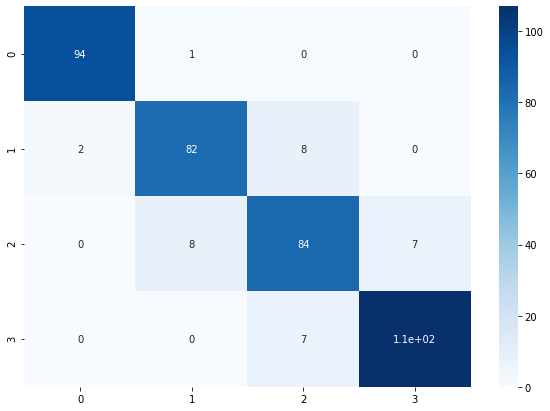

In [146]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in range (4)],
              columns = [i for i in range (4)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="Blues")

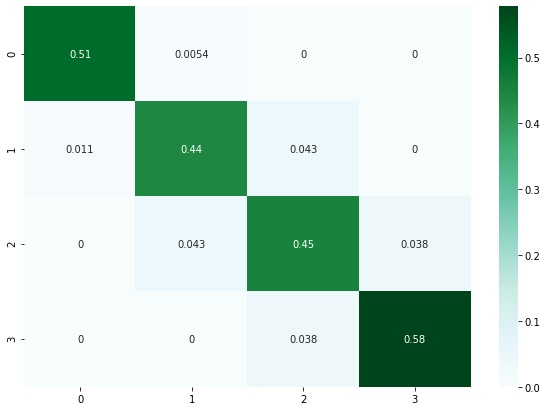

In [147]:
df_ncm = pd.DataFrame(ncm, index = [i for i in range (4)],
              columns = [i for i in range (4)])
plt.figure(figsize = (10,7))
sn.heatmap(df_ncm, annot=True,cmap="BuGn")